In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from config import DATA
from zipfile import ZipFile
from utils import get_data


# path = DATA.kaggle
# zip_file = ZipFile(path)
# file = str(path.name).split(path.suffix)[0]
# df = pd.read_csv(zip_file.open(file))
# prod_cnt = sorted(Counter(df.product_id.to_list()).items(), key=lambda x: x[1])


# from collections import Counter
# _, trans = get_data(DATA.ibm_2021)
# ans = []
# for tran in trans:
#     ans.extend(tran)
# prod_cnt = sorted(Counter(ans).items(), key=lambda x: x[1])

In [7]:
print(f"pid type: {len(prod_cnt)}")
print(f"tid type: {len(trans)}")

pid type: 52
tid type: 828


Text(0, 203.46118761451328, 'μ+σ = 193.461')

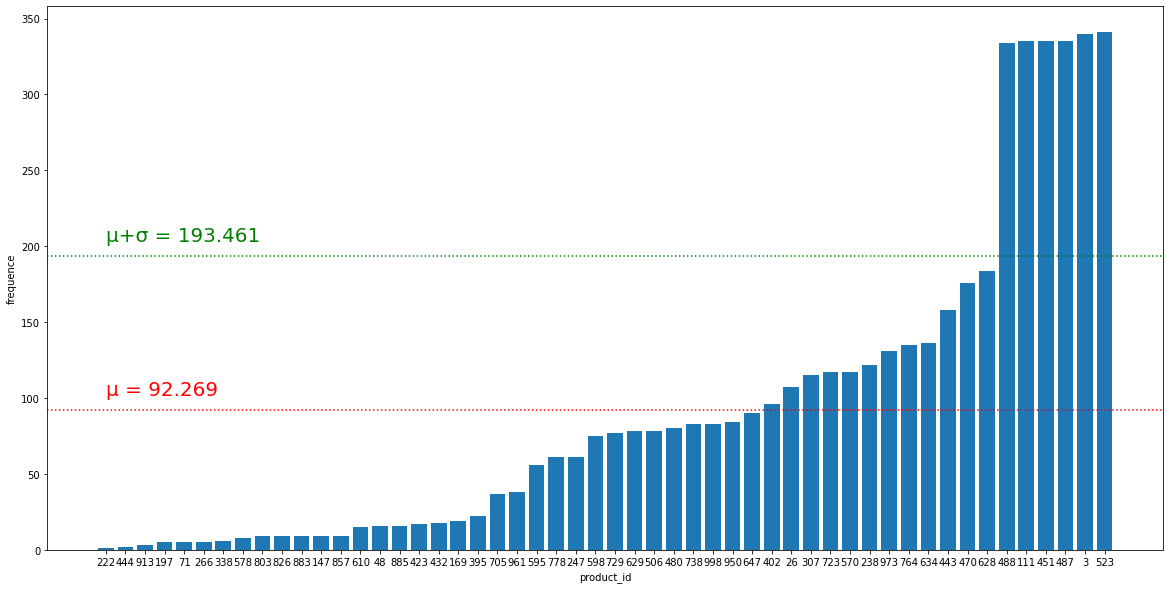

In [2]:
import numpy as np
plt.figure(figsize=(20, 10))
x, y = zip(*prod_cnt)
x = np.array(x)
y = np.array(y)
plt.bar(x, y)
plt.xlabel('product_id')
plt.ylabel('frequence')
plt.axhline(y=y.mean(), color='r', linestyle=':')
plt.axhline(y=y.mean() + y.std(), color='g', linestyle=':')
plt.text(0, y.mean()+10, f"μ = {y.mean():.3f}", color='r', size=20)
plt.text(0, y.mean() + y.std()+10, f"μ+σ = {y.mean() + y.std():.3f}", color='g', size=20)

In [24]:
print(f"| count | max | min | mean | std | coef of var")
print(f"| --- | --- | --- | ---- | --- |")
print(f"| {y.shape} | {y.max()} | {y.min()} | {y.mean():.3f} | {y.std():.3f} | y.mean()")

| count | max | min | mean | std |
| --- | --- | --- | ---- | --- |
| (49677,) | 472565 | 1 | 652.908 | 4792.066 |


In [2]:
def run_fp_growth(*, transactions, MIN_SUP, min_conf):
    # ============================== FP-Growth Algo ==============================
    # Format data.
    fmt_trans = fpg.format_trans(transactions)

    # Build FP-Tree
    fp_tree, header_table = fpg.build_fp_tree(fmt_trans, MIN_SUP)

    if not header_table:
        print(f"Without any association rules !")
        return None

    # # Get all freqent itemsets.
    freq_itemsets = []
    fpg.mining(fp_tree, header_table, MIN_SUP, set([]), freq_itemsets)
    # Compute the support values.
    freq_itemsets = compute_supports(
        map(frozenset, freq_itemsets), transactions)

    # Get association rules.
    return get_association_rules(
        itemsets=freq_itemsets, min_conf=min_conf)


def run_apriori(*, ori_itemsets, transactions, min_sup, min_conf):
    # ============================== Apriori Algo ==============================
    # Get all frequent itemsets.
    freq_itemsets = apr.get_freq_itemsets(
        ori_itemsets=ori_itemsets, transactions=transactions, min_sup=min_sup)

    # Get all association rules.
    return get_association_rules(
        itemsets=freq_itemsets, min_conf=min_conf)


In [32]:
import numpy as np
from datetime import datetime
from time import time
from utils import *
from algos import apriori as apr
from algos import fp_growth as fpg
from config import DATA, PARAMS, WRITE_FILE
from collections import defaultdict
from tqdm import tqdm

dataset = 'ibm_2021'
a = []
b = []

dataset_path = getattr(DATA, dataset)
ori_itemsets, transactions = get_data(path=dataset_path)

for min_conf in range(3, 15, 1):
    min_conf /= 250
    a_tmp = []
    b_tmp = []
    for min_sup in tqdm(range(20, 30, 1)):
        min_sup /= 1500
        MIN_SUP = min_sup * len(transactions)
        # Data read in.

        s = time()
        fpg_rules = run_fp_growth(
            transactions=transactions,
            MIN_SUP=MIN_SUP,
            min_conf=min_conf)
        a_tmp.append(len(fpg_rules))
        if not fpg_rules:
            break

        # s = time()
        # apr_rules = run_apriori(
        #     ori_itemsets=ori_itemsets,
        #     transactions=transactions,
        #     min_sup=min_sup,
        #     min_conf=min_conf)
        # b_tmp.append(len(apr_rules))
    a.append(a_tmp)
    b.append(b_tmp)


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


Text(0, 0.5, 'cost time(sec)')

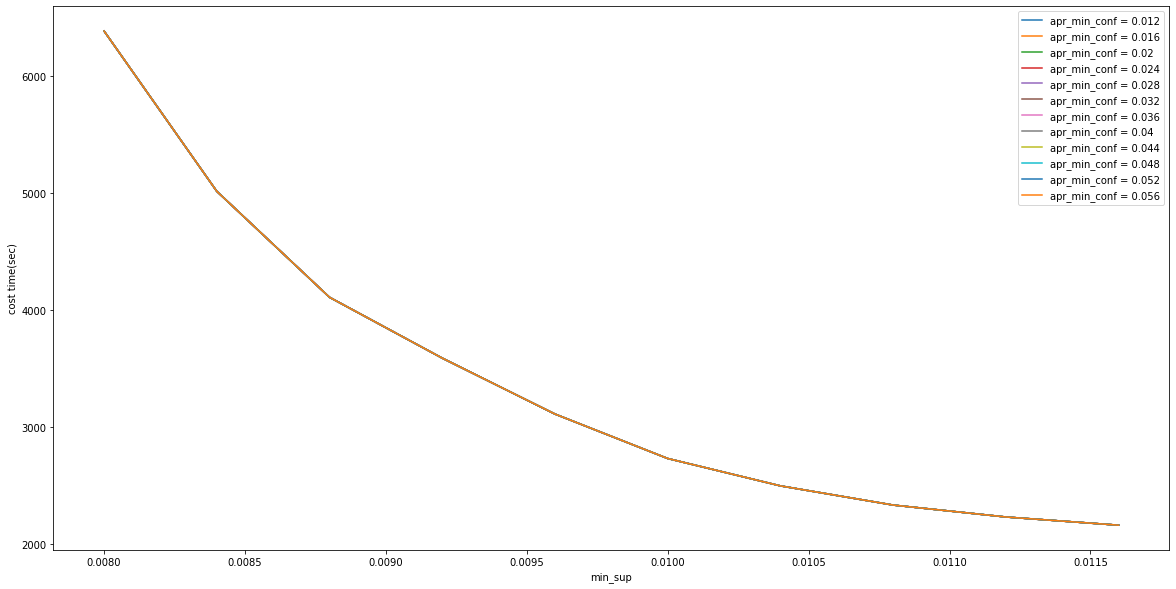

In [34]:
plt.figure(figsize=(20, 10))
m_conf = np.array(range(3, 15, 1)) / 250
m_sup = np.array(range(20, 30, 1)) / 2500

for i, A in enumerate(a):
    if len(A) == len(m_sup):
        plt.plot(m_sup, A[:], label=f'apr_min_conf = {m_conf[i]}')

# for i, A in enumerate(a):
#     if len(A) >= len(m_sup):
#         plt.plot(m_sup, A[:], label=f'fpg_min_conf = {m_conf[i]}')
plt.legend()

plt.xlabel('min_sup')
plt.ylabel('cost time(sec)')
# print(f"ave cost time: {np.array(a).mean()}")

12